In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from copy import copy
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'axes.titlesize': 10,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

from matplotlib.markers import MarkerStyle
import matplotlib as mpl

In [23]:
import GWPhotonCounting
import jax.numpy as jnp

frequencies = jnp.sort(jnp.fft.fftfreq(2**13, d=1/1e4))

detector_nosqz = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_shot_psd_nosqz.csv', 
    '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_classical_psd.csv', 
    gamma=100, random_seed=1632, N_frequency_spaces=10)

detector_sqz = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_total_psd_sqz.csv', None, 
    gamma=100, random_seed=1632, N_frequency_spaces=10)

N_total_filters for Nyquist: 200
N_total_filters from user: 200
N_total_filters for Nyquist: 200
N_total_filters from user: 200


In [24]:
jnp.mean(detector_nosqz.noise_photon_expectation) * 10**2

Array(0.05478251, dtype=float64)

In [25]:
LorentzianModel = GWPhotonCounting.signal.PostMergerLorentzian()
KNNModel = GWPhotonCounting.signal.PostMergerKNN(knn_file_path='/home/ethan.payne/code_libraries/apr4_knn_gw_model_2024/KNN_Models/APR4-knn_model-N100')

# Generating the strain signal
from bilby_cython.geometry import frequency_dependent_detector_tensor
import numpy as np

mtot = 2.4
phi0 = 0
z = 0.05
ra = jnp.pi/4
dec = jnp.pi/4
iota=jnp.pi/4
psi = 0


PM_strain = KNNModel.generate_strain(detector_nosqz, frequencies, mtot, phi0, z, ra, dec, iota, psi)

expected_signal_photon_count = detector_nosqz.calculate_signal_photon_expectation(PM_strain, frequencies)

print(np.max(expected_signal_photon_count))

0.037489236534122186


/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [26]:
import jax.numpy as jnp
import arviz as az

pc_data = []
strain_data = []

for i in range(9):
    pc_data.append(az.from_netcdf(f'result_noise_scaling_250615/pc_noise_scale_{i}.nc').posterior.f0.values.flatten())
    strain_data.append(az.from_netcdf(f'result_noise_scaling_250615/strain_noise_scale_{i}.nc').posterior.f0.values.flatten())

In [27]:
import corner

def rgba_to_hex(rgba):
    """Converts an RGBA tuple to a hex string.

    Args:
        rgba: A tuple representing the RGBA color (e.g., (255, 0, 0, 255)).

    Returns:
        A hex string representing the color (e.g., "#ff0000ff").
    """
    r, g, b, a = np.array(jnp.array(rgba)*255, dtype=int)
    return "#{:02x}{:02x}{:02x}{:02x}".format(r, g, b, a)

#ff7100ff 4 4
#008eb8ff 4 4


/local/ethan.payne/ipykernel_2084721/3510608267.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb2.ax.set_yticklabels(['','',0.1,1,10,100])


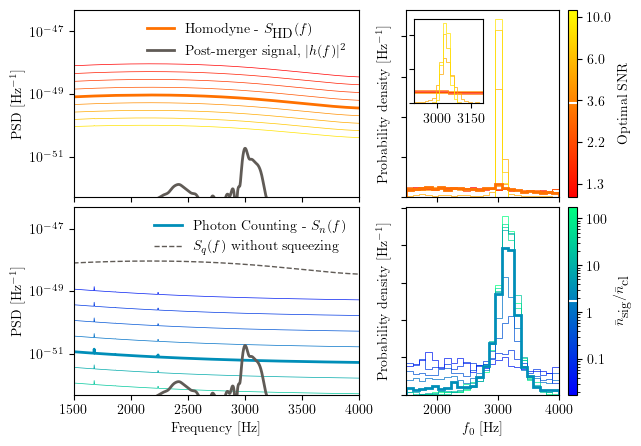

In [32]:
# Building the colormaps
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'axes.titlesize': 10,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

colors = ['C1', (0,0,0)] # first color is black, last is red
cmap_homodyne = plt.get_cmap('autumn')#LinearSegmentedColormap.from_list("Homodyne", colors, N=5)

colors = [(0.9,0.9,0.9), 'navy'] # first color is black, last is red
cmap_pc = plt.get_cmap('winter')#LinearSegmentedColormap.from_list("PhotonCounting", colors, N=5)

fmin = 1.5e3
fmax = 4e3
bins = 25

fig, ax = plt.subplots(2,2, figsize=(6.75, 5), gridspec_kw={'hspace': 0.05, 'wspace': 0.2, 'width_ratios': [1.5, 1], 'height_ratios': [1, 1]}, sharex=False)


axin = ax[0,1].inset_axes([0.05, 0.5, 0.45, 0.45])

for idx, i in enumerate(range(9)):

    factor = 10**(-jnp.linspace(0,20,9)/10)[i]

    if factor != 0.1:
        ax[0,0].semilogy(frequencies, factor*detector_nosqz.shot_noise_psd + detector_nosqz.classical_noise_psd, color=cmap_homodyne(idx/9), lw=0.5)
        ax[0,1].hist(strain_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=0.5)

        if i < 6: bins_in = 3 
        #elif i == 6: bins_in = 10
        else: bins_in = 20
        axin.hist(strain_data[i], bins=jnp.linspace(2.9e3, 3.2e3, bins_in), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=0.5)

    else:
        ax[0,0].semilogy(frequencies, factor*detector_nosqz.shot_noise_psd + detector_nosqz.classical_noise_psd, color=cmap_homodyne(idx/9), lw=2, label=r'Homodyne - $S_\textrm{HD}(f)$')
        ax[0,1].hist(strain_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=2, zorder=2.5)

        print(rgba_to_hex(cmap_homodyne(idx/9)), i, idx)

        if i < 6: bins_in = 3
        else: bins_in = 20
        axin.hist(strain_data[i], bins=jnp.linspace(2.9e3, 3.2e3, bins_in), density=True, histtype='step', color=cmap_homodyne(idx/9), lw=0.5)


for idx, i in enumerate(range(9)):

    factor = jnp.logspace(-2,2,9)[i]

    if factor != 1:
        ax[1,0].semilogy(frequencies, factor*detector_nosqz.classical_noise_psd, color=cmap_pc(1-idx/9), lw=0.5)
        ax[1,1].hist(pc_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_pc(1-(idx)/9), lw=0.5)
    else:
        ax[1,0].semilogy(frequencies, factor*detector_nosqz.classical_noise_psd, color=cmap_pc(1-idx/9), lw=2, label=r'Photon Counting - $S_n(f)$')
        ax[1,1].hist(pc_data[i], bins=jnp.linspace(fmin, fmax, bins), density=True, histtype='step', color=cmap_pc(1-(idx)/9), lw=2,zorder=2.5)

        print(rgba_to_hex(cmap_pc(1-idx/9)), i, idx)

ax[1,0].semilogy(frequencies, detector_nosqz.shot_noise_psd, color='#605B56', lw=1, label=r'$S_q(f)$ without squeezing', ls="--")

ax[0,0].plot(frequencies, np.abs(PM_strain)**2, color='#605B56', lw=2, label=r'Post-merger signal, $|h(f)|^2$')
ax[1,0].plot(frequencies, np.abs(PM_strain)**2, color='#605B56', lw=2)


ax[0,0].legend(loc='upper right', frameon=False)
ax[1,0].legend(loc='upper right', frameon=False)


ax[0,0].set_xlim(1.5e3, 4e3)
ax[1,0].set_xlim(1.5e3, 4e3)

ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])
axin.set_yticklabels([])

axin.set_xticks([3e3, 3.15e3])

ax[0,1].set_xlim(fmin, fmax)
ax[1,1].set_xlim(fmin, fmax)
ax[0,0].set_ylim(5e-53, 5e-47)
ax[1,0].set_ylim(5e-53, 5e-47)
axin.set_xlim(2.9e3, 3.2e3)

ax[1,0].set_xlabel(r'Frequency [Hz]')
ax[1,1].set_xlabel(r'$f_0$ [Hz]')
ax[0,0].set_ylabel(r'PSD [Hz$^{-1}$]')
ax[1,0].set_ylabel(r'PSD [Hz$^{-1}$]')
ax[0,1].set_ylabel(r'Probability density [Hz$^{-1}$]')
ax[1,1].set_ylabel(r'Probability density [Hz$^{-1}$]')

vmin_i = 1.0976272515356136
vmax_i = vmin_i * 10

cb1 = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=vmin_i, vmax=vmax_i), cmap='autumn'), ax=ax[0,1], orientation='vertical', 
             label='Optimal SNR')

cb1.ax.axhline(np.logspace(np.log10(vmin_i), np.log10(vmax_i), 9)[4], color='w')

cb1.ax.yaxis.set_ticks(np.logspace(np.log10(1.3), np.log10(10), 5))
cb1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.1f'))
cb1.minorticks_off()
#cb1.ax.set_ylim(vmin_i*0.98, vmax_i*1.03)

vmin_i = 1e-2 * 1.76858039
vmax_i = vmin_i * 1e4


cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=vmin_i, vmax=vmax_i), cmap='winter'), ax=ax[1,1], orientation='vertical', 
             label=r'$\bar{n}_{\textrm{sig}}/\bar{n}_{\textrm{cl}}$')

cb2.ax.axhline(np.logspace(np.log10(vmin_i), np.log10(vmax_i), 9)[4], color='w')
#cb2.ax.set_yticks([0.1,1,10,100])
cb2.ax.set_yticklabels(['','',0.1,1,10,100])

#cb2.ax.set_ylim(vmin_i*0.98, vmax_i*1.10)

fig.savefig('figure_noise_scaling_one_photon.pdf', bbox_inches='tight')

In [8]:
pc_data_photons = []

for n in np.linspace(0,3,4, dtype=int):
    pc_data_photons.append(az.from_netcdf(f'result_photon_scaling_250608d/pc_{n}.nc'))

    pc_data_photons[-1].posterior['t0'] = pc_data_photons[-1].posterior['t0']*1000

<Figure size 640x480 with 0 Axes>

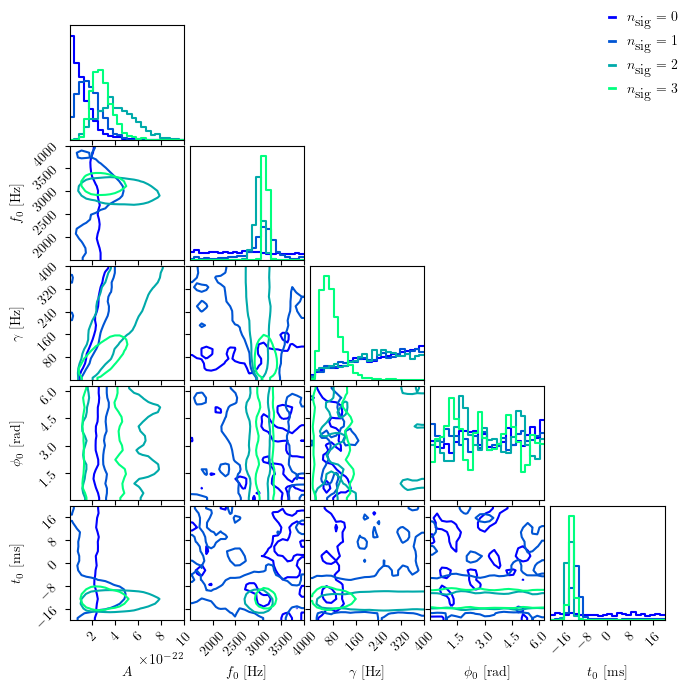

In [9]:
Alims = (0, 10e-22)
f0lims = (1.5e3, 4e3)
gammalims = (0,400)
phaselims = (0,2*np.pi)
t0lims = (-20, 20)


bins = [np.linspace(Alims[0], Alims[1], 25), np.linspace(f0lims[0], f0lims[1], 25),
        np.linspace(gammalims[0], gammalims[1], 25), np.linspace(phaselims[0], phaselims[1], 25),
        np.linspace(t0lims[0], t0lims[1], 25)]

plt.clf()
fig = plt.figure(figsize=(6.75, 6.75))

for i in range(4):
        corner.corner(pc_data_photons[i].posterior, fig=fig,
                            fill_contours=False, plot_density=False, plot_contours=True, levels=[0.9], plot_datapoints=False, color=rgba_to_hex(cmap_pc(i/3)), smooth=0.9,
                            var_names=['A', 'f0', 'gamma', 'phase', 't0'],
                            labels=[r'$A$', r'$f_0$ [Hz]', r'$\gamma$ [Hz]', r'$\phi_0$ [rad]',  r'$t_0$ [ms]'],
                            extent=[(Alims, f0lims, gammalims, phaselims, t0lims)],bins=bins, smooth1d=1e-5, 
                            labelpad=0.1)
        
axes = np.array(fig.get_axes())
axes = axes.reshape((5, 5))

for i in range(5):
    axes[i][0].set_xlim(Alims)

for i in range(4):
    axes[i+1][1].set_xlim(f0lims)

for i in range(3):
    axes[i+2][2].set_xlim(gammalims)

for i in range(2):
    axes[i+3][3].set_xlim(phaselims)

for i in range(1):
    axes[i+4][4].set_xlim(t0lims)

for i in range(1):
    axes[1][i].set_ylim(f0lims)

for i in range(2):
    axes[2][i].set_ylim(gammalims)

for i in range(3):
    axes[3][i].set_ylim(phaselims)

for i in range(4):
    axes[4][i].set_ylim(t0lims)

for i in range(5):
    axes[i][i].set_ylim(0,)

legend_handles = []

for i in range(4):
    legend_handles.append(Line2D([0], [0], color=rgba_to_hex(cmap_pc(i/3)), lw=2, label=r'$n_{\textrm{sig}} = $ '+str(int(i))))

fig.legend(handles=legend_handles, loc='upper right', frameon=False, handlelength=0.5, ncol=1)

#axes[3].axvline(np.abs(frequencies[np.argmax(np.abs(PM_strain))]), color='k', lw=0.5, ls='-', zorder=-1)

fig.savefig('figure_photon_scaling_one_photon.pdf', bbox_inches='tight')

In [10]:
poisson_likelihood = GWPhotonCounting.distributions.PoissonPhotonLikelihood()

observed_signal_photons = jnp.zeros(len(expected_signal_photon_count))
observed_signal_photons = observed_signal_photons.at[jnp.argmax(expected_signal_photon_count)].set(1)

In [11]:
from scipy.special import logsumexp

In [12]:
pc_data = []
hd_data = []

for n in [1]:
    pc_data.append(az.from_netcdf(f'result_high_low_snr_250615/pc_snr_scaling_fac{n}.nc'))
    hd_data.append(az.from_netcdf(f'result_high_low_snr_250615/strain_snr_scaling_fac{n}.nc'))
    
for n in [5]:
    pc_data.append(az.from_netcdf(f'result_high_low_snr_250615c/pc_snr_scaling_fac{n}.nc'))
    hd_data.append(az.from_netcdf(f'result_high_low_snr_250615c/strain_snr_scaling_fac{n}.nc'))

for i in range(2):
    pc_data[i].posterior['t0'] = pc_data[i].posterior['t0']*1000
    hd_data[i].posterior['t0'] = hd_data[i].posterior['t0']*1000

hd_data[1] = hd_data[1].sel(chain=0)

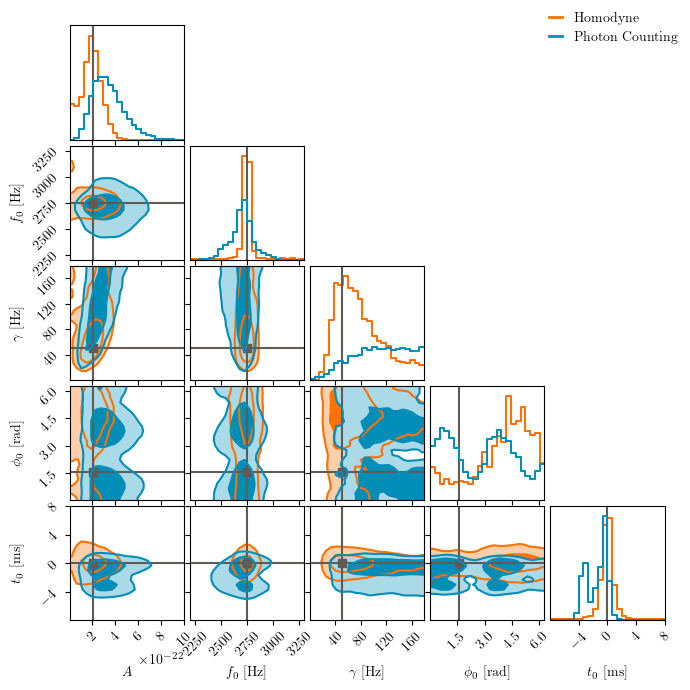

In [13]:
fig = plt.figure(figsize=(6.75, 6.75))


Alims = (0, 10e-22)
f0lims = (2.2e3, 3.3e3)
gammalims = (0,180)
phaselims = (0,2*np.pi)
t0lims = (-8, 8)

bins = [np.linspace(Alims[0], Alims[1], 25), np.linspace(f0lims[0], f0lims[1], 25),
        np.linspace(gammalims[0], gammalims[1], 25), np.linspace(phaselims[0], phaselims[1], 25),
        np.linspace(t0lims[0], t0lims[1], 25)]

corner.corner(hd_data[1], color='#ff7100ff', smooth=0.9, fill_contours=True, plot_density=False, 
              plot_datapoints=False, levels=[0.5, 0.9], fig=fig, var_names=['A', 'f0', 'gamma', 'phase', 't0'],
              labels=[r'$A$', r'$f_0$ [Hz]', r'$\gamma$ [Hz]', r'$\phi_0$ [rad]', r'$t_0$ [ms]'],
              extent=[(Alims, f0lims, gammalims, phaselims, t0lims)],bins=bins, smooth1d=1e-5, 
              labelpad=0.1, weights=2*np.ones(4000),
              truths=[1e-22 * 0.4030487767060607 * 5, 2.75e3, 50, jnp.pi/2, 0], truth_color='#605B56', )
corner.corner(pc_data[1], color='#008eb8ff', smooth=0.9, fill_contours=True, plot_density=False, plot_datapoints=False, levels=[0.5, 0.9], fig=fig,
              var_names=['A', 'f0', 'gamma', 'phase', 't0'],
              labels=[r'$A$', r'$f_0$ [Hz]', r'$\gamma$ [Hz]', r'$\phi_0$ [rad]',  r'$t_0$ [ms]'],
              extent=[(Alims, f0lims, gammalims, phaselims, t0lims)],bins=bins, smooth1d=1e-5, 
              labelpad=0.1)


axes = np.array(fig.get_axes())
axes = axes.reshape((5, 5))

for i in range(5):
    axes[i][0].set_xlim(Alims)

for i in range(4):
    axes[i+1][1].set_xlim(f0lims)

for i in range(3):
    axes[i+2][2].set_xlim(gammalims)

for i in range(2):
    axes[i+3][3].set_xlim(phaselims)

for i in range(1):
    axes[i+4][4].set_xlim(t0lims)

for i in range(1):
    axes[1][i].set_ylim(f0lims)

for i in range(2):
    axes[2][i].set_ylim(gammalims)

for i in range(3):
    axes[3][i].set_ylim(phaselims)

for i in range(4):
    axes[4][i].set_ylim(t0lims)

for i in range(5):
    axes[i][i].set_ylim(0,)

legend_handles = []
legend_handles.append(Line2D([0], [0], color='#ff7100ff', lw=2, label=r'Homodyne'))
legend_handles.append(Line2D([0], [0], color='#008eb8ff', lw=2, label=r'Photon Counting'))
fig.legend(handles=legend_handles, loc='upper right', frameon=False, handlelength=1, ncol=1)

fig.savefig('superthreshold.pdf', bbox_inches='tight')


In [14]:
1/(np.diff(np.quantile(hd_data[1].posterior['A'].values.flatten(),[0.16, 0.84]))/np.diff(np.quantile(pc_data[1].posterior['A'].values.flatten(),[0.16, 0.84])))#/np.var(hd_data[1].posterior['f0'].values.flatten())

array([1.50322691])

In [15]:
1/(np.diff(np.quantile(hd_data[1].posterior['f0'].values.flatten(),[0.16, 0.84]))/np.diff(np.quantile(pc_data[1].posterior['f0'].values.flatten(),[0.16, 0.84])))#/np.var(hd_data[1].posterior['f0'].values.flatten())

array([2.91833667])

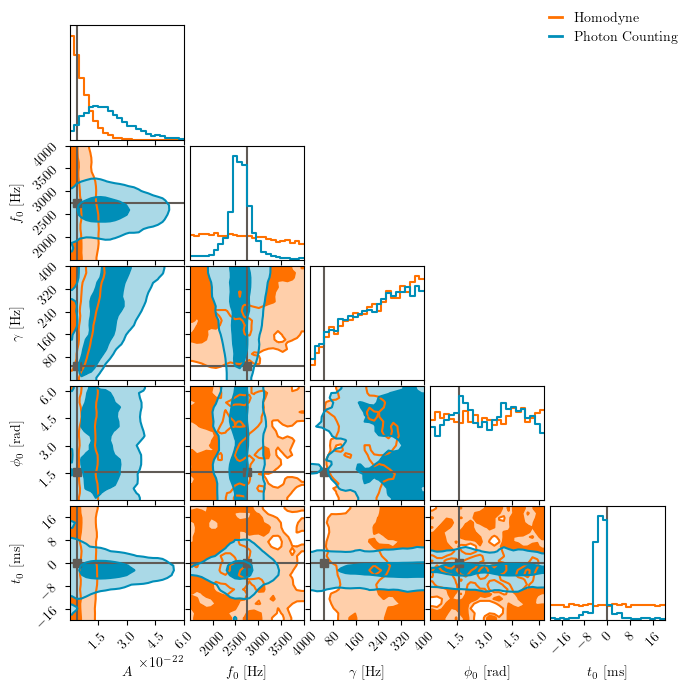

In [16]:
fig = plt.figure(figsize=(6.75, 6.75))

Alims = (0, 6e-22)
f0lims = (1.5e3, 4e3)
gammalims = (0,400)
phaselims = (0,2*np.pi)
t0lims = (-20, 20)

bins = [np.linspace(Alims[0], Alims[1], 25), np.linspace(f0lims[0], f0lims[1], 25),
        np.linspace(gammalims[0], gammalims[1], 25), np.linspace(phaselims[0], phaselims[1], 25),
        np.linspace(t0lims[0], t0lims[1], 25)]

corner.corner(hd_data[0], color='#ff7100ff', smooth=0.9, fill_contours=True, plot_density=False, 
              plot_datapoints=False, levels=[0.5, 0.9], fig=fig, var_names=['A', 'f0', 'gamma', 'phase', 't0'],
              labels=[r'$A$', r'$f_0$ [Hz]', r'$\gamma$ [Hz]', r'$\phi_0$ [rad]', r'$t_0$ [ms]'],
              extent=[(Alims, f0lims, gammalims, phaselims, t0lims)],bins=bins, smooth1d=1e-5, 
              labelpad=0.1,
              truths=[1e-22 * 0.4030487767060607, 2.75e3, 50, jnp.pi/2, 0], truth_color='#605B56')
corner.corner(pc_data[0], color='#008eb8ff', smooth=0.9, fill_contours=True, plot_density=False, plot_datapoints=False, levels=[0.5, 0.9], fig=fig,
              var_names=['A', 'f0', 'gamma', 'phase', 't0'],
              labels=[r'$A$', r'$f_0$ [Hz]', r'$\gamma$ [Hz]', r'$\phi_0$ [rad]',  r'$t_0$ [ms]'],
              extent=[(Alims, f0lims, gammalims, phaselims, t0lims)],bins=bins, smooth1d=1e-5, 
              labelpad=0.1)


axes = np.array(fig.get_axes())
axes = axes.reshape((5, 5))

for i in range(5):
    axes[i][0].set_xlim(Alims)

for i in range(4):
    axes[i+1][1].set_xlim(f0lims)

for i in range(3):
    axes[i+2][2].set_xlim(gammalims)

for i in range(2):
    axes[i+3][3].set_xlim(phaselims)

for i in range(1):
    axes[i+4][4].set_xlim(t0lims)

for i in range(1):
    axes[1][i].set_ylim(f0lims)

for i in range(2):
    axes[2][i].set_ylim(gammalims)

for i in range(3):
    axes[3][i].set_ylim(phaselims)

for i in range(4):
    axes[4][i].set_ylim(t0lims)

for i in range(5):
    axes[i][i].set_ylim(0,)

legend_handles = []
legend_handles.append(Line2D([0], [0], color='#ff7100ff', lw=2, label=r'Homodyne'))
legend_handles.append(Line2D([0], [0], color='#008eb8ff', lw=2, label=r'Photon Counting'))
fig.legend(handles=legend_handles, loc='upper right', frameon=False, handlelength=1, ncol=1)

fig.savefig('subthreshold.pdf', bbox_inches='tight')

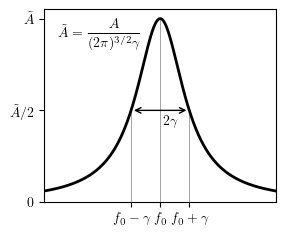

In [17]:
fig = plt.figure(figsize=[3,2.5])

plt.plot(frequencies, np.abs(LorentzianModel.generate_strain(detector_nosqz, frequencies, 2000, 100, 1, 0, 0))[0], color='k', lw=2,zorder=10)
plt.xlim(1.6e3, 2.4e3)
plt.ylim(0,)

amp = 1/(2*np.sqrt(2)*np.pi**1.5*100)

plt.xticks([1.9e3, 2e3, 2.1e3])
plt.yticks([0, amp/2, amp])
plt.plot([1.9e3, 1.9e3], [0, amp/2], color='grey', lw=0.5)
plt.plot([2e3, 2e3], [0, amp], color='grey', lw=0.5)
plt.plot([2.1e3, 2.1e3], [0, amp/2], color='grey', lw=0.5)
#plt.plot([1.9e3, 2.1e3], [amp/2, amp/2], color='grey', lw=0.5)

plt.annotate('', xy=(1.9e3,amp/2), xytext=(2.1e3,amp/2), arrowprops=dict(arrowstyle='<->'))

ax = plt.gca()


ax.set_xticklabels([r'$f_0 -\gamma$', r'$f_0$', r'$f_0+\gamma$'])
ax.set_yticklabels([r'$0$', r'$\tilde{A}/2$', r'$\tilde{A}$'])

plt.text(1.65e3, amp, r'$\tilde{A} = \displaystyle\frac{A}{(2\pi)^{3/2}\gamma}$', ha='left', va='top', fontsize=10)
plt.text(2.01e3, 0.95*amp/2, r'$2\gamma$', ha='left', va='top', fontsize=10)

plt.savefig('lorentzian.png', bbox_inches='tight', dpi=300)


In [18]:
LorentzianModel.generate_strain?

Signature:
LorentzianModel.generate_strain(
    detector,
    frequencies,
    f0,
    gamma,
    A,
    phase,
    t0,
)
Docstring: This needs to be overwritten by the subclass.
File:      ~/projects/GWPhotonCounting/src/GWPhotonCounting/signal.py
Type:      method

In [19]:
import bilby

injection_parameters = dict(
    mass_1=10.0,
    mass_2=10.0,
    a_1=0.0,
    a_2=0.0,
    tilt_1=0.0,
    tilt_2=0.0,
    phi_12=0,
    phi_jl=0.0,
    luminosity_distance=400.0,
    theta_jn=0,
    psi=0,
    phase=0,
    geocent_time=0,
    ra=2.675,
    dec=-1.2108,
)

# Fixed arguments passed into the source model
waveform_arguments = dict(
    waveform_approximant="IMRPhenomXPHM",
    reference_frequency=20.0,
    minimum_frequency=9,
)

# Create the waveform_generator using a LAL BinaryBlackHole source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=128,
    sampling_frequency=8192,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

ifos = bilby.gw.detector.InterferometerList(["H1"])
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=8192,
    duration=128,
    start_time=injection_parameters["geocent_time"] - 2,
)

strain_data = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)[0]



16:57 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
16:57 bilby INFO    : Injected signal in H1:
16:57 bilby INFO    :   optimal SNR = 36.35
16:57 bilby INFO    :   matched filter SNR = 36.35-0.00j
16:57 bilby INFO    :   mass_1 = 10.0
16:57 bilby INFO    :   mass_2 = 10.0
16:57 bilby INFO    :   a_1 = 0.0
16:57 bilby INFO    :   a_2 = 0.0
16:57 bilby INFO    :   tilt_1 = 0.0
16:57 bilby INFO    :   tilt_2 = 0.0
16:57 bilby INFO    :   phi_12 = 0
16:57 bilby INFO    :   phi_jl = 0.0
16:57 bilby INFO    :   luminosity_distance = 400.0
16:57 bilby INFO    :   theta_jn = 0
16:57 bilby INFO    :   psi = 0
16:57 bilby INFO    :   phase = 0
16:57 bilby INFO    :   geocent_time = 0
16:57 bilby INFO    :   ra = 2.675
16:57 bilby INFO    :   dec = -1.2108


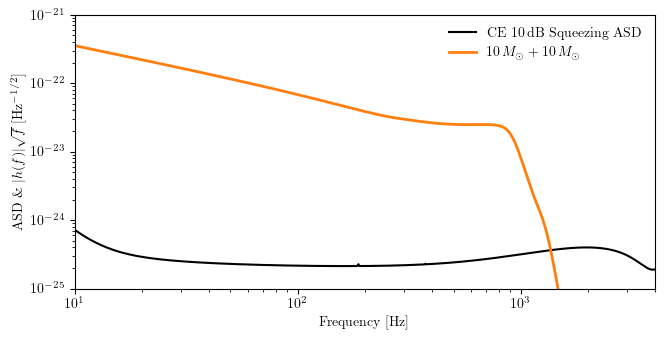

In [20]:
fig = plt.figure(figsize=(6.75, 3.5))

frequencies_psd, asd_data = np.genfromtxt('/home/ethan.payne/code_libraries/bilby/bilby/gw/detector/noise_curves/ce_displacement/cosmic_explorer_ASD.txt').T

plt.plot(frequencies_psd, asd_data, color='k', label=r'CE 10\,dB Squeezing ASD')
plt.plot(waveform_generator.frequency_array, np.abs(strain_data['plus']+strain_data['cross'])*np.sqrt(waveform_generator.frequency_array), color='C1', lw=2, label=r'$10\,M_\odot + 10\,M_\odot$')

plt.legend(loc='upper right', frameon=False)

plt.xlim(10, 4e3)
plt.ylim(1e-25, 1e-21)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'ASD \& $|h(f)|\sqrt{f}$ [Hz$^{-1/2}$]')
plt.tight_layout()
plt.savefig('ce_asd.png', dpi=300, bbox_inches='tight')